## Polynomial Regression Model

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import  LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\AVANISH SINGH\OneDrive\Desktop\Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
# inplace = true # to make changes permanent
# axis = 1 # to drop the column we can use axis=0 to drop rows


In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<Axes: xlabel='TV', ylabel='Sales'>

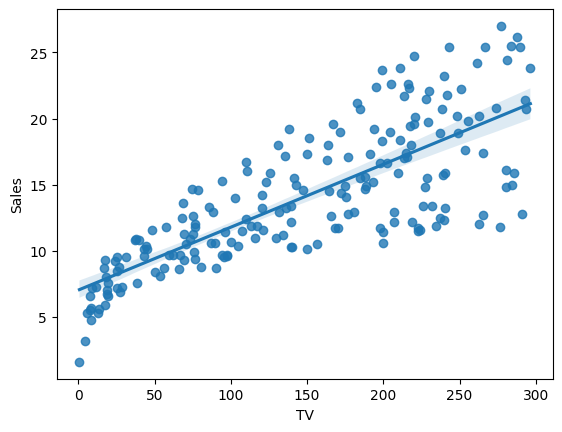

In [6]:
import seaborn as sns
sns.regplot(x='TV',y='Sales',data = df)

In [7]:
x = df.drop('Sales', axis=1) # independent variables here if we use inplace then the changes will be permanent
y = df['Sales'] # dependent variable
from sklearn.preprocessing import PolynomialFeatures
polynomial_convertor = PolynomialFeatures(degree=2, include_bias=False) # degree=2 means we are converting the features into quadratic form and 
# include_bias = False means we are not including the constant term




In [8]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
poly_features = polynomial_convertor.fit_transform(x)
poly_features


array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]],
      shape=(200, 9))

In [11]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

### Training and Testing a Polynomial Regression Model with MAE, MSE, and RMSE

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=4)
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, test_predictions)
MSE =  mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print("The Mean Absolute Error (MAE) is: ", MAE)
print("The Mean Squared Error (MSE) is: ", MSE)
print("The Root Mean Squared Error (RMSE) is: ", RMSE)

The Mean Absolute Error (MAE) is:  0.4668158603765848
The Mean Squared Error (MSE) is:  0.3753204214716661
The Root Mean Squared Error (RMSE) is:  0.6126340028693038
